# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Shalin\\Springboard bootcamp\\projects\\Guided Capstone project 1'

In [3]:
filename = 'C:\\Shalin\\Springboard bootcamp\\projects\\Guided Capstone project 1\\data\\step3_output.csv'
df = pd.read_csv(filename)

df.head(5)

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.000000,53.00000,90.0,0.0,0
1,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.000000,34.00000,152.0,30.0,0
2,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.000000,78.00000,104.0,80.0,1
3,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,1,...,88.0,0.0,110.0,84.0,300.0,47.000000,47.00000,107.0,0.0,2
4,Bear Mountain,California,8805,1665,0,0.0,0,2,1,2,...,198.0,198.0,122.0,76.0,100.0,57.916957,64.16681,130.0,0.0,1


## Apply Model to Training Dataset and evaluate Test Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

## Standardize the magnitude of numeric features

In [4]:
# For the prediction of Adult weekend ticket price of 'Big Mountain resort', there is no relevance of State and Name columns 
# Since the dimensions of training and test set should be the same, removing 'Both' and State' columns for the purpose
# would be a better approach. Also as concluded in Step 5,  Model 2 didn't have these columns and yet provided good performance
df_without_name = df.drop(columns = ['Name','state'], axis = 1)

In [5]:
df_without_name.columns

Index(['summit_elev', 'vertical_drop', 'trams', 'fastEight', 'fastSixes',
       'fastQuads', 'quad', 'triple', 'double', 'surface', 'total_chairs',
       'Runs', 'TerrainParks', 'LongestRun_mi', 'SkiableTerrain_ac',
       'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen', 'averageSnowfall',
       'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac',
       'clusters'],
      dtype='object')

In [6]:
df_without_name.shape

(270, 24)

In [7]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df_without_name.drop(['AdultWeekend'], axis = 1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df_without_name['AdultWeekend'] 

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

C:\Users\gosal\Anaconda3_2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gosal\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [8]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [9]:
X_train.shape

(202, 23)

In [10]:
X_test.shape

(68, 23)

In [11]:
y_train.shape

(202,)

In [12]:
y_test.shape

(68,)

In [13]:
#Linear Regresion model on testing data set
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [14]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = lm.predict(X_test)

In [15]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
# You can plug y_test and y_pred into the functions to evaluate the model
evs = explained_variance_score(y_test, y_pred)
evs

0.7596580348808419

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mae

6.613244205230069

In [17]:
print('explained_variance_score',explained_variance_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))
print('The mean for Adult Weekend price', model.intercept_)

explained_variance_score 0.7596580348808419
mean_absolute_error 6.613244205230069
The mean for Adult Weekend price 15.835174275079517


In [18]:
pd.DataFrame(abs(model.coef_), X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'], ascending=False).head(10)

,Coefficient
clusters,2.925300
quad,0.894422
AdultWeekday,0.721611
surface,0.659590
TerrainParks,0.479834
total_chairs,0.475917
triple,0.358863
double,0.244726
fastQuads,0.126947
Runs,0.042305


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [19]:
df.columns

Index(['Name', 'state', 'summit_elev', 'vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac', 'clusters'],
      dtype='object')

In [20]:
df_Big_Mountain = df[(df['Name'].str.contains('Big') & df['Name'].str.contains('Mountain'))]
df_Big_Mountain

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
51,Big Squaw Mountain Ski Resort,Maine,3200,660,0,0.0,0,0,0,1,...,0.0,0.0,67.0,6.0,0.0,30.0,30.0,58.0,0.0,0
72,Big Powderhorn Mountain,Michigan,1800,600,0,0.0,0,0,0,0,...,253.0,228.0,100.0,55.0,214.0,69.0,69.0,108.0,0.0,0
79,Big Snow Resort - Indianhead Mountain,Michigan,1935,638,0,0.0,0,0,1,1,...,240.0,150.0,120.0,60.0,204.0,49.0,49.0,120.0,0.0,0


In [21]:
df_Big_Mountain[['Name','yearsOpen','averageSnowfall','SkiableTerrain_ac','summit_elev','vertical_drop']]

,Name,yearsOpen,averageSnowfall,SkiableTerrain_ac,summit_elev,vertical_drop
51,Big Squaw Mountain Ski Resort,6.0,0.0,0.0,3200,660
72,Big Powderhorn Mountain,55.0,214.0,253.0,1800,600
79,Big Snow Resort - Indianhead Mountain,60.0,204.0,240.0,1935,638


Since there is no 'Big Mountain Resort' in the dataframe as you see in the extracted dataframe above, there could be a typo, so we go back to the problem statement that indicates that the resort was established in 1942,  has an annual snowfall of 333 inches with 3000 acres of skier rider accessible terrain. One of them shows 6 years, whereas for the remaining 2 Since the units in the dataframe could be different, it is still not very clear which of the 2 resorts is 'Big Mountain Resort'

Also, additional info in the problem statement indicates that for the 'Big Mountain Resort' the summit elevation is 6,817 feet with a vertical drop of 2,353 feet, so we can dry to use arithmatic operators to find the ratio of the 3 entiries

In [22]:
def commonratio(a,b):
    first = a/(a+b)
    second = b/(a+b)
    return first,second

In [23]:
original = commonratio(6817,2353)
print(original)

(0.74340239912759, 0.25659760087241)


In [24]:
# Calculate for 'Big Powderhorn Mountain'
big_powderhorn = commonratio(1800,600)
print(big_powderhorn)

(0.75, 0.25)


In [25]:
## Calculate for 'Big Snow Resort - Indianhead Mountain'
big_indianhead = commonratio(1935,638)
big_indianhead = commonratio(1935,638)
print(big_indianhead)

(0.7520404197434901, 0.2479595802565099)


Since this ratio doesn't match, we will try to find a record where the summit elevation is 6,817 feet with a vertical drop of 2,353 feet

In [26]:
df[(df['summit_elev'] == 6817) & (df['vertical_drop'] == 2353)]

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
122,Whitefish Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


Going by the above calculation, **Big Snow Resort - Indianhead Mountain** is the **Big Mountain Resort**

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [27]:
big_mountain_row = df[df['Name'] == 'Whitefish Mountain Resort']
big_mountain_row

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
122,Whitefish Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


In [28]:
big_mountain_row = big_mountain_row.drop(columns = ['state','Name'], axis=1)

In [29]:
big_mountain_row

,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
122,6817,2353,0,0.0,0,3,2,6,0,3,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


In [30]:
big_mountain_row.index

Int64Index([122], dtype='int64')

In [31]:
#using the whole dataset as the train set
X_train = X_scaled 

#scaled data for Big Mountain
X_test_2 = X_scaled[big_mountain_row.index]

#train test data (ticket prices)
y_train = y 

#Test data 
y_test_2 = y[big_mountain_row.index]

# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred_2 = model.predict(X_test_2)

evs = explained_variance_score(y_test, y_pred)
evs

mae = mean_absolute_error(y_test, y_pred)
mae


print('explained_variance_score',explained_variance_score(y_test_2,y_pred_2))
print('mean_absolute_error',mean_absolute_error(y_test_2,y_pred_2))
print('The mean for Adult Weekend price', model.intercept_)

explained_variance_score 1.0
mean_absolute_error 6.072232264747058
The mean for Adult Weekend price 59.28291663347935


In [32]:
pd.DataFrame(abs(model.coef_), X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'], ascending=False)

,Coefficient
AdultWeekday,1.318904e+01
SkiableTerrain_ac,2.775385e+00
vertical_drop,2.451385e+00
quad,1.577141e+00
Runs,1.372601e+00
clusters,1.292252e+00
surface,1.220701e+00
triple,1.052155e+00
summit_elev,9.277495e-01
NightSkiing_ac,8.682435e-01


**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [33]:
print ("The Expected Adult weekend price is: $" + str(y_pred_2).replace('[','').replace(']',''))

The Expected Adult weekend price is: $87.07223226


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [34]:
actual_price = df[df['Name'].str.contains('Whitefish Mountain Resort')][['Name','AdultWeekend']]
actual_price

,Name,AdultWeekend
122,Whitefish Mountain Resort,81.0


In [35]:
actual = actual_price.loc[:,'AdultWeekend'].values.astype(int)
actual
print ("The Actual Adult weekend price is: $" + str(actual).replace('[','').replace(']',''))

The Actual Adult weekend price is: $81


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

The most highly co-related variables to **AdultWeekend** (Weekend ticket price $) are 
1) Adult Weekday 

2) Skiiable Terrain 

3) Vertical drop

Since Adult Weekday is very obvious, we won't plot a chart for that. However we will plot 3 charts by cluseters created using kmeans 

1) Relationship between Summit evelation and Vertical drop (terrain height and depth features) 

2) Relationship between Skiiable terrain and Adult weekend ticket price (to find out if terrain is a very important factor for the ticket price)

3) Relationship between Vertical drop and Adult weekend ticket price (to find out if Elevation from summit to the base is an important factor for the ticket price)

In [36]:
from sklearn.cluster import KMeans
x = df.drop(columns=['Name','state'], axis =1)
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
centers = kmeans3.cluster_centers_

In [37]:
x.shape

(270, 24)

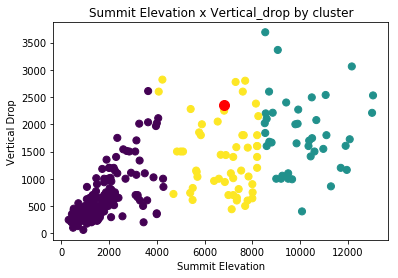

In [39]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(big_mountain_row['summit_elev'], big_mountain_row['vertical_drop'], c='red', s=100)
plt.xlabel('Summit Elevation')
plt.ylabel('Vertical Drop')
plt.title('Summit Elevation x Vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

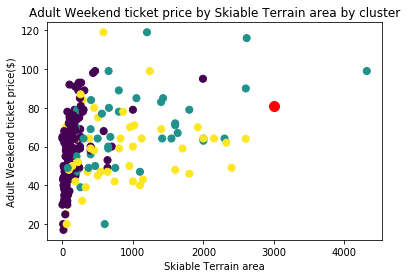

In [41]:
plt.scatter(df['SkiableTerrain_ac'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(big_mountain_row['SkiableTerrain_ac'], big_mountain_row['AdultWeekend'], c='red', s=100)
plt.xlabel('Skiable Terrain area')
plt.ylabel('Adult Weekend ticket price($)')
plt.title('Adult Weekend ticket price by Skiable Terrain area by cluster')
plt.savefig('figures/fig2.png',bbox_inches='tight')

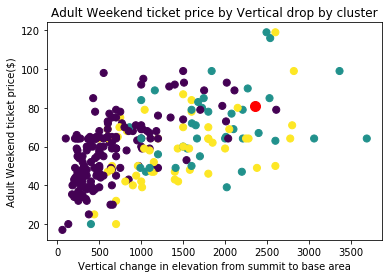

In [42]:
plt.scatter(df['vertical_drop'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(big_mountain_row['vertical_drop'], big_mountain_row['AdultWeekend'], c='red', s=100)
plt.xlabel('Vertical change in elevation from summit to base area')
plt.ylabel('Adult Weekend ticket price($)')
plt.title('Adult Weekend ticket price by Vertical drop by cluster')
plt.savefig('figures/fig3.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [43]:
#from sklearn import joblib
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [44]:
coeff_df = pd.DataFrame(abs(model.coef_), X.columns, columns=['Coefficient'])

In [45]:
coeff_df['MAE'] = mean_absolute_error(y_test_2, y_pred_2)

In [46]:
coeff_df['Exp_Var'] = explained_variance_score(y_test_2, y_pred_2)

In [47]:
data_path = 'C:\\Shalin\\Springboard bootcamp\\projects\\Guided Capstone project 1\\models'

In [48]:
print ("The current working directory is %s" % data_path)

The current working directory is C:\Shalin\Springboard bootcamp\projects\Guided Capstone project 1\models


In [49]:
os.chdir(data_path) 

In [50]:
# Write your coefficient dataframe to csv 
coeff_df.to_csv('model performance metrics', index=False)